In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

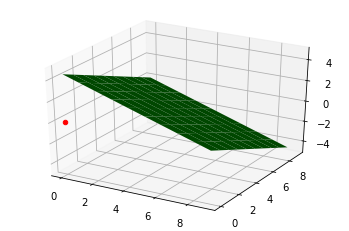

In [74]:
point  = np.array([1, 2, 3])
normal = np.array([1, 1, 2])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -point.dot(normal)

# create x,y
xx, yy = np.meshgrid(range(10), range(10))

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]


# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, z, color="green")
# Ensure that the next plot doesn't overwrite the first plot
ax = plt.gca()

#ax.plot(x3,y3,z3)
point1  = np.array([0, 0, 0])
ax.scatter(point1[0],point1[1],point1[2],  color='red')
plt.show()

In [193]:
a = np.array([2, 2, 2])
b = np.array([4, 2, 2.1])
c = np.array([4, 6, 2.1])
d = np.array([2, 6, 2])

In [194]:
pf = np.array([3, 4, 0])
vf = np.array([0, 0, 2])

In [195]:
def normv(n):
    return n / np.linalg.norm(n)

def abc2plane(a,b,c):
    ba, ca = b - a, c - a
    n = np.cross(ba,ca,axis=0)
    d = -a.dot(n)
    n1 = normv(n)
    return n1,d

def planepointintersec(pf,vf,n,p):
    s = pf + (n.dot(p-pf)) / (n.dot(vf)) * vf
    phi = np.arcsin(abs(n.dot(vf))/(np.linalg.norm(n)*np.linalg.norm(vf)))
    return s, phi

In [196]:
n1,d_plane = abc2plane(a,b,c)
# note: x vector is oriented from a to b. this is different to nastran ele coord, but doesnt matter
xelm = normv(b-a)
s,phi = planepointintersec(pf,vf,n1,a)
np.degrees(phi)

87.13759477388835

In [208]:
# check in cpp data if sihn is needed
s2pf = np.linalg.norm(s-pf)
s2pf

2.05

## local coord system

In [197]:
zelm = n1
yelm = normv(np.cross(zelm,xelm,axis=0))
yelm

array([ 0.,  1., -0.])

In [198]:
basis = np.array([[1,0,0],[0,1,0],[0,0,1]])
basisele = np.array([xelm,yelm,zelm])
tm = np.linalg.solve(basis,basisele)

In [199]:
# transform points to local element coord 
aele, bele, cele, dele = tm.dot(a-a), tm.dot(b-a), tm.dot(c-a), tm.dot(d-a)
sele = tm.dot(s-a)
aele, bele, cele, dele

(array([0., 0., 0.]),
 array([2.00249844, 0.        , 0.        ]),
 array([2.00249844, 4.        , 0.        ]),
 array([0., 4., 0.]))

## point inside triangle

In [201]:
def sign(p1, p2, p3):
    return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])


def PointInAABB(pt, c1, c2):
    return c2[0] <= pt[0] <= c1[0] and  c2[1] <= pt[1] <= c1[1]

def pointintriangle(pt, v1, v2, v3):
    b1 = sign(pt, v1, v2) <= -0.00001
    b2 = sign(pt, v2, v3) <= -0.00001
    b3 = sign(pt, v3, v1) <= -0.00001
    return (b1 == b2) and (b2 == b3) # and PointInAABB(pt, map(max, v1, v2, v3), map(min, v1, v2, v3))

In [202]:
pointintriangle(sele[0:2],aele[0:2], bele[0:2],cele[0:2])

True

In [203]:
pointintriangle(sele[0:2],aele[0:2], cele[0:2],dele[0:2])

True